In [1]:
import pandas as pd

df = pd.read_csv('./wine_review.csv')   # 현재 위치에 있는 csv데이터 파일을 df에 불러오기
df.head()                               # csv 파일이 제대로 출력되는지 확인

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [2]:
df.keys()

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [3]:
import re

df['reviews.text'] = df['reviews.text'].fillna('') # 결측값 제거
df['reviews.text'] = df['reviews.text'].astype(str) # 문자열 변환

# 노이즈 제거
df['reviews.text'] = df['reviews.text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))  # 특수 문자 제거
df['reviews.text'] = df['reviews.text'].apply(lambda x: re.sub(r'\d+', '', x))          # 숫자 제거
df['reviews.text'] = df['reviews.text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip()) # 불필요한 공백 제거

df['reviews.text'] # 노이즈를 제거한 결과값 출력

0            This a fantastic white wine for any occasion
1             Tart not sweetvery refreshing and delicious
2       I was given this wine so it was a delightful s...
3       This is a phenomenal wine and my new favorite red
4       ml bottles for the price of two With way less ...
                              ...                        
2885    I only like a sweet wine I was skeptical on or...
2886    I ordered a bottle set of both the Meritage Mo...
2887    I ordered the White Zinfadel in the bottle sel...
2888    This was my first purchase of these wines Trie...
2889    I dont know why the negative reviews said the ...
Name: reviews.text, Length: 2890, dtype: object

In [4]:
%pip install nltk
import nltk as nltk
nltk.download('stopwords') # nltk 불용어 리스트 다운
nltk.download('punkt') # 토큰화 도구

from nltk.corpus import stopwords # nltk 불용어 모듈
from nltk.tokenize import word_tokenize # 단어 단위로 토큰화 위해 word_tokenize 함수 사용

stop_words = set(stopwords.words('english')) # 불용어 리스트 변수에 저장 
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
# reviews.text 토큰화 후 불용어에 해당하지 않는 단어만 포함시키는 리스트 생성

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer # 스테밍과 표제어 추출을 위함
nltk.download('wordnet') # 표제어 추출을 위함

# 스테밍 적용
stemmer = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# 표제어 추출 적용
lemmatizer = WordNetLemmatizer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기 초기화

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# 감정 점수 계산 함수
def calc_sentiment(review):
    return vader_sentiment.polarity_scores(review)["compound"] # VADER 감정 분석의 compound 점수는 -1에서 1 사이의 값을 가지며, 이는 감정의 강도를 나타냄

df['sentiment_score'] = df['reviews.text'].apply(calc_sentiment) # 감정 점수 컬럼 추가

print(df[['reviews.text', 'sentiment_score']].head()) # 결과 출력

                                        reviews.text  sentiment_score
0                           fantast white wine occas           0.0000
1                      tart sweetveri refresh delici           0.0000
2  given wine delight surpris find flavor delici ...           0.5994
3                      phenomen wine new favorit red           0.0000
4  ml bottl price two way le packag ye plea nervo...           0.6694


In [9]:
#  리뷰의 별점과 라벨링된 감정 점수가 일치하는지 확인하는 함수
def check_labeling(review_rating, sentiment_label):
    if review_rating >= 2 and sentiment_label == 1:
        return "Match"
    elif review_rating < 2 and sentiment_label == 0:
        return "Match"
    else:
        return "Mismatch"


# review_rating과 라벨링된 감정 점수 비교
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)  # 감정 점수에 따라 라벨링 (감정점수 0이상이면 긍정인 1, 0 미만인 부정이면 0으로 라벨링)
df['Check_Labeling'] = df.apply(lambda row: check_labeling(row['reviews.rating'], row['sentiment_label']), axis=1)

# 결과 출력
print(df[['reviews.rating', 'sentiment_label', 'Check_Labeling']])

# Match로 출력되는 비율 계산
match_count = (df['Check_Labeling'] == 'Match').sum() # 'Check_Labeling' 열에서 'Match'인 항목의 수를 세고 match_count에 저장
total_count = len(df) # DataFrame의 총 행 수를 total_count에 저장
match_ratio = match_count / total_count # 'Match'로 출력되는 비율을 계산하여 match_ratio에 저장
print("matching ratio", match_ratio) # 'Match'로 출력되는 비율 출력

      reviews.rating  sentiment_label Check_Labeling
0                5.0                1          Match
1                5.0                1          Match
2                5.0                1          Match
3                5.0                1          Match
4                5.0                1          Match
...              ...              ...            ...
2885             5.0                1          Match
2886             5.0                1          Match
2887             5.0                1          Match
2888             5.0                1          Match
2889             5.0                1          Match

[2890 rows x 3 columns]
matching ratio 0.7674740484429066


In [10]:
# 특성과 라벨을 분리
x = df['sentiment_score'].values.reshape(-1, 1) # 감정 점수
y = df['sentiment_label'] # 감정 점수에 기반한 라벨 (위에서 라벨링한 것)

In [11]:
from sklearn.model_selection import train_test_split

# 모델을 학습시킨 후 성능 평가 위해 데이터셋 학습 세트와 테스트 세트로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 주어진 데이터셋을 학습 데이터와 테스트 데이터로 8:2비율로 나누고 random_state를 42로 설정하여 데이터 분할할 때 일관된 결과를 얻도록 함

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [13]:
model = LogisticRegression() # 로지스틱 회귀 모델 초기화

param_grid = {'C': [0.1, 1, 10, 100]} # 하이퍼파라미터 그리드 정의

grid_search = GridSearchCV(model, param_grid, cv=5) # 그리드 서치 수행
#cv=5는 5겹 교차 검증을 의미하는데 기본값이 5임
grid_search.fit(x_train, y_train) # 학습 세트로 모델 학습

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]})

In [14]:
print("Best parameters found: ", grid_search.best_params_) # 그리드 서치를 통해 찾은 최적 하이퍼파라미터 출력

Best parameters found:  {'C': 100}


In [15]:
# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_ # 최적 모델을 best_model에 할당
y_pred = best_model.predict(x_test) # X_text데이터에 대한 예측값을 변수에 저장

In [16]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred) # 정확도
precision = precision_score(y_test, y_pred) # 정밀도
recall = recall_score(y_test, y_pred) # 재현률
f1 = f1_score(y_test, y_pred) # F1 점수
roc_auc = roc_auc_score(y_test, y_pred) # ROC-AUC 점수
 
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC-AUC: ", roc_auc)

Accuracy:  0.9878892733564014
Precision:  0.9868173258003766
Recall:  1.0
F1 Score:  0.9933649289099526
ROC-AUC:  0.9351851851851851


In [17]:
# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)    # 전체 모델 분류 보고서 도출
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.99      1.00      0.99       524

    accuracy                           0.99       578
   macro avg       0.99      0.94      0.96       578
weighted avg       0.99      0.99      0.99       578



In [18]:
from sklearn.model_selection import cross_val_score

# 5-겹 교차 검증 수행을 통해 오버피팅 해결함

cv_accuracy = cross_val_score(best_model, x, y, cv=5, scoring='accuracy').mean() # 정확도
cv_precision = cross_val_score(best_model, x, y, cv=5, scoring='precision').mean() # 정밀도 
cv_recall = cross_val_score(best_model, x, y, cv=5, scoring='recall').mean() # 재현률
cv_f1 = cross_val_score(best_model, x, y, cv=5, scoring='f1').mean() # F1 점수 
cv_roc_auc = cross_val_score(best_model, x, y, cv=5, scoring='roc_auc').mean() # ROC-AUC

print("CV Accuracy: ", cv_accuracy)
print("CV Precision: ", cv_precision)
print("CV Recall: ", cv_recall)
print("CV F1 Score: ", cv_f1)
print("CV ROC-AUC Score: ", cv_roc_auc)

CV Accuracy:  0.9923875432525952
CV Precision:  0.9917426635730775
CV Recall:  1.0
CV F1 Score:  0.9958504711936709
CV ROC-AUC Score:  1.0


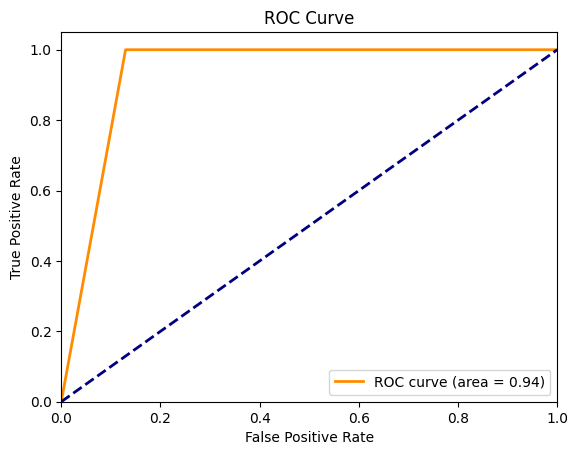

In [19]:
#matplot이용한 결과 시각화

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 예측 생성
y_pred = best_model.predict(x_test)

# ROC 곡선 생성
fpr, tpr, _ = roc_curve(y_test, y_pred)  # ROC 곡선의 거짓 양성 비율 및 참 양성 비율 계산
roc_auc = auc(fpr, tpr)  # ROC 곡선 아래 영역(AUC) 계산

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # ROC 곡선 그리기
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선 그리기
plt.xlim([0.0, 1.0])  # X 축 범위 설정
plt.ylim([0.0, 1.05])  # Y 축 범위 설정
plt.xlabel('False Positive Rate')  # X 축 레이블 설정
plt.ylabel('True Positive Rate')  # Y 축 레이블 설정
plt.title('ROC Curve')  # 그래프 제목 설정
plt.legend(loc='lower right')  # 범례 위치 설정
plt.show()  # 그래프 출력

plt.show()  # 그래프 출력

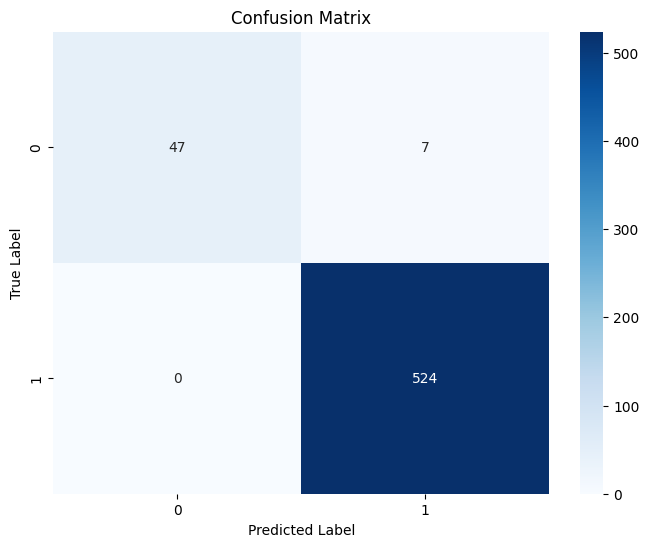

In [21]:
#seaborn 사용

import seaborn as sns
# 혼동 행렬 생성
confusion = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))  # 그래프 사이즈 설정
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")  # 혼동 행렬 그리기
plt.title('Confusion Matrix')  # 그래프 제목 설정
plt.xlabel('Predicted Label')  # X 축 레이블 설정
plt.ylabel('True Label')  # Y 축 레이블 설정
plt.show()  # 그래프 출력